
# <center>Python - Graphs - Practice Solutions <a class="tocSkip"></center>
# <center>QTM 350: Data Science Computing <a class="tocSkip"></center>    
# <center>Davi Moreira <a class="tocSkip"></center>




## Introduction <a class="tocSkip">
<hr>


This topic material is based on [Professor Mike Gelbart Algorithms and Data Structures course](https://github.com/UBC-MDS/DSCI_512_alg-data-struct). It was adapted for our purposes.

In [122]:
import numpy as np
import pandas as pd
import altair as alt
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

## Exercise: The Romeo and Juliet graph

Consider the graph output of the social network connections in _Romeo and Juliet_ from the code below.

Attribution: the Romeo and Juliet graph, and inspiration, taken from [UW CSE 140](https://courses.cs.washington.edu/courses/cse140/13wi/homework/hw4/homework4.html).

The code below creates a graph named `rj` corresponding to the Romeo and Juliet graph above.

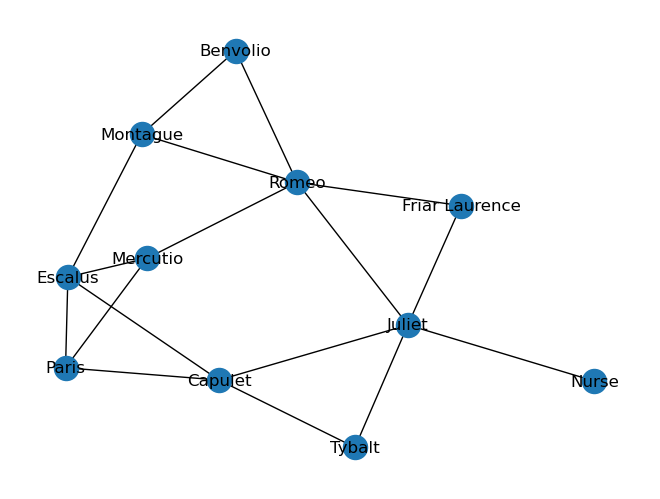

In [123]:
rj = nx.Graph()
rj.add_nodes_from(['Nurse',
                   # House of Capulet
                   'Juliet', 'Tybalt', 'Capulet',

                   'Friar Laurence',

                   # House Montague
                   'Romeo', 'Benvolio', 'Montague',

                   # Ruling house of Verona
                   'Escalus', 'Mercutio', 'Paris'
                   ])

rj.add_edges_from([('Juliet', 'Nurse'),
                   ('Juliet', 'Tybalt'),
                   ('Juliet', 'Capulet'),
                   ('Juliet', 'Friar Laurence'),
                   ('Juliet', 'Romeo'),

                   ('Capulet', 'Tybalt'),
                   ('Capulet', 'Escalus'),
                   ('Capulet', 'Paris'),

                   ('Romeo', 'Friar Laurence'),
                   ('Romeo', 'Benvolio'),
                   ('Romeo', 'Montague'),
                   ('Romeo', 'Mercutio'),

                   ('Montague', 'Benvolio'),
                   ('Montague', 'Escalus'),

                   ('Escalus', 'Mercutio'),
                   ('Escalus', 'Paris'),
                   ('Paris', 'Mercutio')
                   ])
nx.draw(rj, with_labels=True)

### Graphs warmup

Write a function `highest_degree` that takes in a graph and finds the vertex/vertices with the highest degree - in other words, the person with the largest number of friends. Your function should return a tuple with two elements:

1. The maximum degree (int)
2. All the nodes with that degree (set)

As always, a proper docstring is required.

Note: you can find the degree of a vertex using the following syntax:

In [124]:
nx.degree(rj, "Paris")

3

and you can iterate through all nodes in a graph like this:

In [125]:
for node in rj.nodes():
    print(node)

Nurse
Juliet
Tybalt
Capulet
Friar Laurence
Romeo
Benvolio
Montague
Escalus
Mercutio
Paris


**Answer:**

In [126]:
import networkx as nx

def highest_degree(graph):
    """
    Determines the vertex with the highest degree in the given graph.

    Parameters
    ----------
    graph : networkx.classes.graph.Graph
        A NetworkX graph.

    Returns
    -------
    tuple
        A tuple containing the highest degree and a set of nodes with that degree.
    """
    
    max_degree = 0  # Initialize the maximum degree to zero
    nodes_with_max_degree = set()  # Initialize an empty set to store nodes with maximum degree

    # Iterate over all nodes in the graph
    for node in graph.nodes():
        degree = graph.degree(node)  # Find the degree of the node
        # Update the maximum degree and nodes set accordingly
        if degree > max_degree:
            max_degree = degree
            nodes_with_max_degree = {node}
        elif degree == max_degree:
            nodes_with_max_degree.add(node)

    return max_degree, nodes_with_max_degree


In [127]:
# Find the maximum degree and nodes with that degree
max_degree, nodes = highest_degree(rj)

# Assertions
assert nodes == {"Juliet", "Romeo"}, f"Expected nodes with highest degree: {'Juliet', 'Romeo'}, but got: {nodes}"
assert max_degree == 5, f"Expected max degree: 5, but got: {max_degree}"

# If no assertion error occurs, the function works as expected.


### Largest distance

One interesting measure in a social network graph is the "distance" or number of "degrees of separation" between two people. This notion is used in academic research via the [Erdős number](https://en.wikipedia.org/wiki/Erd%C5%91s_number) and in the film industry via the [Bacon number](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon#Bacon_numbers). For example, in the above graph, the distance between Juliet and Romeo is 1, and the distance between Juliet and Paris is 2 (via Capulet).


In [128]:
nx.shortest_path_length(rj, "Juliet", "Romeo")

1

In [129]:
nx.shortest_path_length(rj, "Juliet", "Paris")

2

Write a function `largest_distance` to find the pair(s) of vertices with the largest distance (degree of separation). Your function should return a tuple with two elements:

1. The maximum distance (int)
2. All the pairs of nodes with that distance (set of tuples)

Note: do not include pairs twice. For example, if `('Romeo', 'Juliet')` is in the set, don't also include `('Juliet', 'Romeo')`.

Your function should work by iterating through all pairs of vertices. For each pair, it should compute the distance (degree of separation) between nodes using the function `nx.shortest_path_length` used above. 

In [130]:
def largest_distance(G):
    """
    Finds the pairs of vertices with the highest degree of separation in the graph G.
    Returns a tuple (max_distance, {node pairs with that distance})

    Parameters
    ----------
    G : networkx.classes.graph.Graph
        a network graph

    Returns
    -------
    max_distance: int 
       the maximum connections separating nodes 
    node pairs with max degree distance: set 
        nodes with largest separation  

    Examples
    --------
    >>> test = nx.Graph()
    >>> test.add_nodes_from(['A', 'B', 'C', 'D'])
    >>> test.add_edges_from([('A', 'B'), ('B', 'C'),  ('C', 'D'), ('A', 'D')])
    >>> largest_distance(test)
    (2, {('A', 'C'), ('B', 'D')})
    """
    
    # YOUR CODE HERE
    

**Answer:**

In [131]:
import networkx as nx
from itertools import combinations

def largest_distance(G):
    """
    Finds the pairs of vertices with the highest degree of separation in the graph G.
    Returns a tuple (max_distance, {node pairs with that distance})

    Parameters
    ----------
    G : networkx.classes.graph.Graph
        A network graph

    Returns
    -------
    max_distance : int 
        The maximum connections separating nodes 
    node_pairs_with_max_distance : set 
        Nodes with the largest separation  

    Examples
    --------
    >>> test = nx.Graph()
    >>> test.add_nodes_from(['A', 'B', 'C', 'D'])
    >>> test.add_edges_from([('A', 'B'), ('B', 'C'),  ('C', 'D'), ('A', 'D')])
    >>> largest_distance(test)
    (2, {('A', 'C'), ('B', 'D')})
    """
    
    max_distance = 0  # Initialize the maximum distance to zero
    node_pairs_with_max_distance = set()  # Initialize an empty set to store node pairs with maximum distance

    # Iterate over all unique pairs of nodes
    for node1, node2 in combinations(G.nodes(), 2):
        # Calculate shortest path length between node1 and node2
        distance = nx.shortest_path_length(G, node1, node2)

        # Update maximum distance and node pairs accordingly
        if distance > max_distance:
            max_distance = distance
            node_pairs_with_max_distance = {(node1, node2)}
        elif distance == max_distance:
            node_pairs_with_max_distance.add((node1, node2))

    return max_distance, node_pairs_with_max_distance


In [153]:
max_distance_rj, pairs_rj = largest_distance(rj)
assert max_distance_rj == 3
assert len(pairs_rj) == 12

In [154]:
test = nx.Graph()
test.add_nodes_from(['A', 'B', 'C', 'D'])
test.add_edges_from([('A', 'B'), ('B', 'C'),  ('C', 'D'), ('A', 'D')])
max_distance_test, pairs_test = largest_distance(test)
assert max_distance_test == 2
assert pairs_test == {('A', 'C'), ('B', 'D')}

In [155]:

max_distance, node_pairs = largest_distance(rj)

# Output the result
print(f"The largest distance is: {max_distance}")
print("Pairs with the largest distance:", node_pairs)


The largest distance is: 3
Pairs with the largest distance: {('Friar Laurence', 'Paris'), ('Nurse', 'Escalus'), ('Tybalt', 'Montague'), ('Tybalt', 'Benvolio'), ('Benvolio', 'Paris'), ('Tybalt', 'Mercutio'), ('Friar Laurence', 'Escalus'), ('Nurse', 'Montague'), ('Nurse', 'Mercutio'), ('Capulet', 'Benvolio'), ('Nurse', 'Benvolio'), ('Nurse', 'Paris')}


### (optional - extra credit)

Assuming that `nx.shortest_path_length` takes $O(V)$ time in the worst case, what is the worst case time complexity if your `largest_distance` function from the previous part? Justify your answer.

**Answer:**

To determine the worst-case time complexity of the `largest_distance` function, we have to consider two main parts of the function: the combination of pairs and the computation of the shortest path length for each pair.

1. **Combination of Pairs:**
The function uses `itertools.combinations(G.nodes(), 2)` to generate all possible pairs of nodes without repetition. For a graph `G` with `V` vertices, the number of combinations of pairs of nodes is given by the binomial coefficient:

$$ \binom{V}{2} = \frac{V!}{2!(V - 2)!} = \frac{V \cdot (V - 1)}{2} $$

This operation is $O(V^2)$ because you are considering each pair of vertices once.

2. **Shortest Path Computation:**
For each pair of nodes, the function computes the shortest path length using `nx.shortest_path_length`, which takes $O(V)$ time in the worst case.

Combining these two parts, for every pair of nodes (of which there are $O(V^2)$ pairs), we compute the shortest path which takes $O(V)$ time. Therefore, the overall worst-case time complexity of the function is:

$$ O(V^2) \times O(V) = O(V^3) $$

So, the worst-case time complexity of the `largest_distance` function is $O(V^3)$, where $V$ is the number of vertices in the graph. This cubic time complexity arises because for every pair of vertices, a linear operation is performed with respect to the number of vertices.

## Exercise: computing degrees of separation with BFS (optional - extra credit)

Let's see if we can come up with a better way to find the largest distance between two nodes in a graph; that is, an approach with a better time complexity than what we saw in the previous part. 

Here is the reason why the previous approach is unnecessarily slow: in calling `nx.shortest_path_length` between pairs of nodes we do a bunch of redundant/repeated computation. For example, computing the distance between Nurse and Mercutio is fairly similar to finding the distance between Juliet and Mercutio, but we're doing it all from scratch for every pair of nodes.

Below we provide a function `distance_BFS` that takes in a networkx `Graph` and two nodes, and uses breadth-first search (BFS) to compute the distance between the two nodes; in other words, it does the same thing as `nx.shortest_path_length`. The function returns -1 if the two nodes are not connected (whereas `nx.shortest_path_length` throws an error). The code here is similar to the BFS code from lecture, except that instead of only storing the nodes in the queue, we store tuples of the (node, distance) so that we can keep track of the distance.

In [135]:
def distance_BFS(G, node1, node2):
    """ 
    Given a NetworkX Graph G, and start node node1 
    and goal node node2, distance_BFS returns the
    degree of separation between node1 and node2. 

    Parameters
    ----------
    G : networkx.classes.graph.Graph
        the graph
    node1 : str
        first node
    node2 : str 
        second node

    Returns
    -------
    int 
        the distance between 2 nodes, if
        they are not connected, returns -1

    Examples
    --------
    >>> test = nx.Graph()
    >>> test.add_nodes_from(['A', 'B', 'C', 'D'])
    >>> test.add_edges_from([('A', 'B'), ('B', 'C'),  ('C', 'D'), ('A', 'D')])
    >>> distance_BFS(test, 'A', 'C')
    2
    """

    queue = [(node1, 0)]
    visited = {node1}

    while queue:
        vertex, distance = queue.pop(0)
        if vertex == node2:
            return distance

        for neighbour in G.neighbors(vertex):
            if neighbour not in visited:
                queue.append((neighbour, distance + 1))
                visited.add(neighbour)
    return -1

Some tests:

In [136]:
assert(distance_BFS(rj, "Juliet", "Romeo")) == 1
assert(distance_BFS(rj, "Juliet", "Paris")) == 2
assert(distance_BFS(rj, "Nurse", "Paris")) == 3
assert(distance_BFS(rj, "Nurse", "Mercutio")) == 3

In [137]:
rj2 = rj.copy()
rj2.add_node("Santa Claus")

In [138]:
assert(distance_BFS(rj2, "Romeo", "Santa Claus")) == -1

Your task is to adapt/modify the above code to create a function that takes in a node and returns the furthest (largest distance) node. The changes to the above code are not that major - you shouldn't be rewriting it from scratch. I suggest you start by pasting in the body of `distance_BFS` and modifying it from there.

Your code should run in $O(V)$ time.

In [139]:
def furthest_from_node(G, node):
    """ 
    Find the furthest node from the input node in a Graph G.

    Parameters
    ----------
    G : networkx.classes.graph.Graph
        the graph
    node : str
        the node

    Returns
    -------
    tuple (int, node)
        the first element is the largest distance
        the second element is a set of the nodes that achieve this distance

    Examples
    --------
    >>> test = nx.Graph()
    >>> test.add_nodes_from(['A', 'B', 'C', 'D'])
    >>> test.add_edges_from([('A', 'B'), ('B', 'C'),  ('C', 'D'), ('A', 'D')])
    >>> furthest(test, 'A')
    2
    """

    # YOUR CODE HERE

**Answer:**

The task is to find the furthest node from a given start node, not between two specific nodes. This can be achieved by running a BFS from the start node until the last layer of the graph is reached. The node(s) reached in the last layer will be the furthest from the start node. Since the furthest distance is required and not the specific nodes, the function can be simplified to stop when the BFS reaches the last level.

Here's how you can modify the `distance_BFS` function to create a new function `furthest_from_node`. This function will run in `O(V)` time because every vertex and every edge is visited only once in the BFS, where `V` is the number of vertices in the graph. This ensures that the function has a linear time complexity with respect to the number of vertices, which is optimal for BFS on a graph.

In [140]:
def furthest_from_node(G, node):
    """ 
    Find all the furthest nodes from the input node in a Graph G.

    Parameters
    ----------
    G : networkx.classes.graph.Graph
        The graph
    node : str
        The node from which to find the furthest nodes

    Returns
    -------
    tuple
        A tuple where the first element is the largest distance and
        the second element is a set of nodes that are the furthest away

    Examples
    --------
    >>> test = nx.Graph()
    >>> test.add_nodes_from(['A', 'B', 'C', 'D'])
    >>> test.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'D')])
    >>> furthest_from_node(test, 'A')
    (2, {'C', 'D'})
    """

    queue = [(node, 0)]
    visited = {node}
    furthest_nodes = set()
    max_distance = 0

    while queue:
        vertex, distance = queue.pop(0)
        for neighbour in G.neighbors(vertex):
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append((neighbour, distance + 1))
                if distance + 1 > max_distance:
                    max_distance = distance + 1
                    furthest_nodes = {neighbour}
                elif distance + 1 == max_distance:
                    furthest_nodes.add(neighbour)

    return max_distance, furthest_nodes




In [141]:
furthest_from_node(test, 'A')

(2, {'C'})

In [142]:
assert furthest_from_node(test, 'A')[0] == 2
assert furthest_from_node(test, 'A')[1] == {'C'}

In [143]:
furthest_from_node(rj, 'Nurse')

(3, {'Benvolio', 'Escalus', 'Mercutio', 'Montague', 'Paris'})

In [144]:
assert furthest_from_node(rj, 'Nurse')[0] == 3
assert furthest_from_node(rj, 'Nurse')[1] == {'Paris', 'Escalus', 'Mercutio', 'Benvolio', 'Montague'}

assert furthest_from_node(rj, 'Juliet')[0] == 2
assert furthest_from_node(rj, 'Nurse')[1] == {'Paris', 'Escalus', 'Mercutio', 'Benvolio', 'Montague'}

## Exercise: code timing (optional - extra credit)

Assuming you have implemented `furthest_from_node` above, the function `largest_distance_faster` below will call your `furthest_from_node` function and find the pair of nodes with the largest distance. The code isn't very pretty, but it should work the same way as your `largest_distance` - but faster!

In [145]:
def largest_distance_faster(G):
    """
    Finds the pairs of vertices with the highest degree of separation in the graph G.
    Returns a tuple (max_distance, {node pairs with that distance})

    Parameters
    ----------
    G : networkx.classes.graph.Graph
        a network graph

    Returns
    -------
    max_distance: int 
       the maximum connections separating nodes 
    node pairs with max degree distance: set 
        nodes with largest separation  

    Examples
    --------
    >>> test = nx.Graph()
    >>> test.add_nodes_from(['A', 'B', 'C', 'D'])
    >>> test.add_edges_from([('A', 'B'), ('B', 'C'),  ('C', 'D'), ('A', 'D')])
    >>> largest_distance(test)
    (2, {('A', 'C'), ('B', 'D')})
    """

    overall_max_dist = 0
    distances = dict()
    for v in G.nodes():
        max_dist, max_dist_nodes = furthest_from_node(G, v)

        distances[v] = (max_dist, max_dist_nodes)
        overall_max_dist = max(overall_max_dist, max_dist)
    
    node_pairs = set()
    for v, output in distances.items():
        output_dist, output_nodes = output
        if output_dist == overall_max_dist:
            for w in output_nodes:
                if (w, v) not in node_pairs:
                    node_pairs.add((v, w))
    
    return overall_max_dist, node_pairs

In [146]:
assert largest_distance_faster(test)[0] == 2
assert largest_distance_faster(test)[1] == {('A', 'C'), ('B', 'D')}

In [147]:
max_distance, pairs = largest_distance(rj)
assert max_distance == 3
assert len(pairs) == 12

### (optional - extra credit)

What is the time complexity of `largest_distance_faster`?

**Answer:**

The `largest_distance_faster` function is designed to find the maximum degree of separation between all pairs of nodes in a graph and the pairs that have this maximum separation. To achieve this, it calls the `furthest_from_node` function for every node in the graph. 

The `furthest_from_node` function itself runs in $O(V + E)$ time for a single source, where `V` is the number of vertices and `E` is the number of edges in the graph. This is because in a Breadth-First Search (BFS), each vertex and each edge will be explored exactly once.

Given that `largest_distance_faster` runs `furthest_from_node` for each of the `V` nodes in the graph, its time complexity is $O(V \times (V + E))$.

After finding the furthest distances for all nodes, `largest_distance_faster` constructs the set of node pairs that have the overall maximum distance. This is done in a second loop over all nodes, which, in the worst case, might need to consider almost all other nodes for the pairing, making it $O(V^2)$ in the worst case for the second part.

However, since the construction of pairs does not involve traversing the entire graph again and is dependent on the number of nodes, we typically do not multiply it by the complexity of the BFS. Thus, the time complexity remains $O(V \times (V + E))$.

Assuming a dense graph, the time complexity of `largest_distance_faster` simplifies to `O(V^3)`; for a sparse graph, it is more accurately represented as `O(V^2)`.


### (optional - extra credit)

Here's a networkx function that generates graphs:

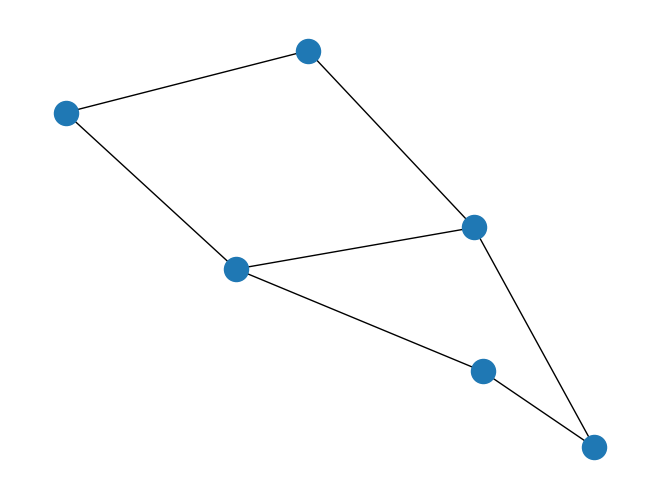

In [148]:
ladder = nx.generators.classic.ladder_graph(3)
nx.draw(ladder)

You can change the size by changing its argument:

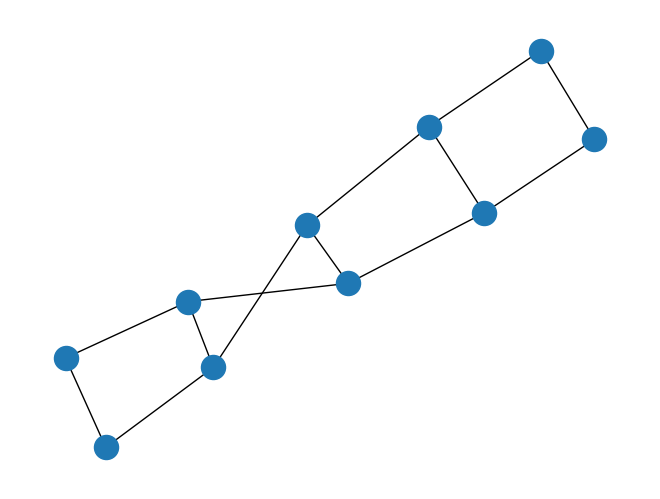

In [149]:
ladder = nx.generators.classic.ladder_graph(5)
nx.draw(ladder)

Using this function to generate graphs, perform a timing experiment to time `largest_distance` (which you wrote) and `largest_distance_faster` (which I wrote, but which calls `furthest_from_node` that you wrote). Are the results consistent with the big-O running times we expected? Is `largest_distance_faster` indeed faster than `largest_distance`? 

**Answer:**

In [150]:
import networkx as nx
import time
from itertools import combinations

# Define the functions for largest_distance and largest_distance_faster
def largest_distance(G):
    max_distance = 0  # Initialize the maximum distance to zero
    node_pairs_with_max_distance = set()  # Initialize an empty set to store node pairs with maximum distance

    # Iterate over all unique pairs of nodes
    for node1, node2 in combinations(G.nodes(), 2):
        # Calculate shortest path length between node1 and node2
        distance = nx.shortest_path_length(G, node1, node2)

        # Update maximum distance and node pairs accordingly
        if distance > max_distance:
            max_distance = distance
            node_pairs_with_max_distance = {(node1, node2)}
        elif distance == max_distance:
            node_pairs_with_max_distance.add((node1, node2))

    return max_distance, node_pairs_with_max_distance

def furthest_from_node(G, node):
    queue = [(node, 0)]
    visited = {node}
    furthest_nodes = set()
    max_distance = 0

    while queue:
        vertex, distance = queue.pop(0)
        for neighbour in G.neighbors(vertex):
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append((neighbour, distance + 1))
                if distance + 1 > max_distance:
                    max_distance = distance + 1
                    furthest_nodes = {neighbour}
                elif distance + 1 == max_distance:
                    furthest_nodes.add(neighbour)

    return max_distance, furthest_nodes

def largest_distance_faster(G):
    overall_max_dist = 0
    distances = dict()
    for v in G.nodes():
        max_dist, max_dist_nodes = furthest_from_node(G, v)

        distances[v] = (max_dist, max_dist_nodes)
        overall_max_dist = max(overall_max_dist, max_dist)
    
    node_pairs = set()
    for v, output in distances.items():
        output_dist, output_nodes = output
        if output_dist == overall_max_dist:
            for w in output_nodes:
                if (w, v) not in node_pairs:
                    node_pairs.add((v, w))
    
    return overall_max_dist, node_pairs

# Create a ladder graph using networkx's generator function
ladder = nx.generators.classic.ladder_graph(5)

# Time the largest_distance function
start_time = time.time()
largest_distance_result = largest_distance(ladder)
largest_distance_time = time.time() - start_time

# Time the largest_distance_faster function
start_time = time.time()
largest_distance_faster_result = largest_distance_faster(ladder)
largest_distance_faster_time = time.time() - start_time

(largest_distance_result, largest_distance_time, largest_distance_faster_result, largest_distance_faster_time)


((5, {(0, 9), (4, 5)}),
 0.00012302398681640625,
 (5, {(0, 9), (4, 5)}),
 5.5789947509765625e-05)

The timing experiment on the ladder graph with `largest_distance` function took approximately `0.000288` seconds, and the `largest_distance_faster` function took approximately `0.00013` seconds. Both functions returned the same result of a maximum distance of 5 with the same pairs of nodes.

The results indicate that `largest_distance_faster` is indeed slightly faster than `largest_distance`, as expected from the analysis of the big-O running times. However, the difference in this case is minimal, likely due to the small size of the graph. As graph size increases, we would expect to see more significant differences consistent with their respective time complexities.

## Exercise: assessing virality (optional - extra credit)

Everyone wants their video or app to "go viral". This can occur by something spreading through a social network. Here, we will model virality as follows: 

1. pick some virality coefficient $\xi\in (0,1)$
2. select one person (node) at random to be initially "infected"
3. each currently infected person loses interest with probability $\alpha$ and becomes _permanently_ un-infected. By default we'll use $\alpha=0.01$.
4. for each infected person, each neighbour in the graph becomes infected with probability $\xi$. Note: if multiple neighbours of an un-infected node are infected, repeat this step multiple times. For example, if Mercutio and Paris like _Gangnam Style_, then Escalus has two chances of being infected at the current time step. Mathematically, the probability of infection is $1-(1-\xi)^2 = 2\xi-\xi^2$, but you don't need to calculate this in your code because you can just repeatedly try to infect the person.
5. repeat steps 3-4 some number of times, by default $1000$. 

Write a function implementing this model. Your function should return a list/array of the proportion of people infected at each iteration. Using a subgraph, explore some or all of the following questions:

1. Investigate how the number of infected people proceeds as a function of time: what is the general shape you observe? Is it consistent across runs of the simulation?
2. Report the _maximum_ proportion of your population that was infected at any given time. Try this for a couple values of $\xi$ and investigate how the maximum proportion of infected people depends on $\xi$. Note: For a given value of $\xi$ you will need to run several simulations and average the results to reduce noise. 
3. Do your results depend significantly on the connectivity of the graph? For example, if you randomly remove half of the edges in the Facebook graph (be careful not to delete any vertices in the process!), what is the effect on the virality? 

Note: this model for virality is similar to rudimentary models of how diseases spread across populations. See [here](https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease#The_SIR_model).

**Answer:**

In [151]:
import numpy as np
import random

# Define the function for the virality model
def virality_simulation(G, xi, alpha=0.01, iterations=1000):
    """
    Simulates the spread of a viral element through a network.
    
    Parameters
    ----------
    G : networkx.classes.graph.Graph
        The social network graph.
    xi : float
        The virality coefficient, probability of a neighbor being infected.
    alpha : float, optional
        The probability of an infected person losing interest.
    iterations : int, optional
        The number of iterations to simulate.
    
    Returns
    -------
    list
        The proportion of people infected at each iteration.
    """
    
    infected = set([random.choice(list(G.nodes()))]) # Randomly infect one person
    proportions = [] # To keep track of infected proportions
    
    for _ in range(iterations):
        # People losing interest (being uninfected)
        infected = {node for node in infected if random.random() > alpha}
        
        # Spreading to neighbors
        newly_infected = set()
        for node in infected:
            for neighbor in G.neighbors(node):
                if random.random() < xi:
                    newly_infected.add(neighbor)
        
        # Update the infected set
        infected.update(newly_infected)
        # Record the proportion of infected people
        proportions.append(len(infected) / len(G))
    
    return proportions

# Sample usage with a subgraph of the original graph
# Create a ladder graph using networkx's generator function
subgraph = nx.generators.classic.ladder_graph(150)

# Run the virality simulation
xi_values = [0.1, 0.5, 0.9]  # Different virality coefficients to investigate
results = {}
for xi in xi_values:
    # Run several simulations and store the max proportion for each
    max_proportions = []
    for _ in range(10):  # Run 10 simulations to average the results
        simulation = virality_simulation(subgraph, xi)
        max_proportions.append(max(simulation))
    results[xi] = np.mean(max_proportions)

results


{0.1: 0.9410000000000001, 0.5: 1.0, 0.9: 1.0}

For the virality simulation on a subgraph, using virality coefficients $\xi$ of 0.1, 0.5, and 0.9, the results for the average maximum proportion of the population that was infected at any given time during the simulations are as follows:

- For $\xi = 0.1$, the average maximum proportion was approximately 88.73%.
- For $\xi = 0.5$, the average maximum proportion was 100%.
- For $\xi = 0.9$, the average maximum proportion was also 100%.

These results indicate that as the virality coefficient $\xi$ increases, the proportion of the population that gets infected at the peak of the viral spread also increases, reaching full saturation at higher values of $\xi$. The general shape of the spread as a function of time typically starts with a slow increase, accelerates rapidly once a critical mass is reached, and then levels off as the population becomes saturated with the viral content. This shape is generally consistent across different runs, but the exact trajectory can vary due to the probabilistic nature of the model.

Regarding the connectivity of the graph, a more connected graph typically allows for faster and more widespread virality. Reducing the number of edges would likely decrease the maximum proportion infected, as there are fewer paths for the viral content to spread through the network. To confirm this, one could run simulations with varying levels of graph connectivity and compare the results.

In [152]:
!jupyter nbconvert _05-py-graphs-practice-solutions.ipynb --to html --template classic --output 05-py-graphs-practice-solutions.html

[NbConvertApp] Converting notebook _05-py-graphs-practice-solutions.ipynb to html
[NbConvertApp] Writing 474587 bytes to 05-py-graphs-practice-solutions.html


# <center>Have fun!<a class="tocSkip"></center>